# Object Detection - Graphical Degrading and Object Detection

## Steps for Part 1 - Graphical Degrading
1. Download zip code from assignment repository
1. Download the yolov3.weights from the readme in the github repository (This file is too big for github versioning)
1. Edit/Create an git "exclude" file in the main portfolio directory ".git/info".  Add "yolov3.weights" on a line by itself.  This avoids a git push failure due to the size of the file.
1. Fill in the missing code in this notebook  (You will need the working code examples to do the next step)
1. Create a python class that allows the following
   - Reads in the image
   - Create a loop that alters individual changes of the items below to determine names of identified objects and their confidence (down to when the object detetion is lost).  Remember to reset the image through each pass as they are not iterative.
     - size
     - rotation
     - noise (of your choice)
   - Graph the results
   
## Steps for Part 2 - Object Detection
1.  Generate a web interface python script that ingests a POST command of a picture Use [postman](https://www.postman.com/) to generate the post with picture of your choice.
1.  Returns the items detected and the assocated confidence
1.  Add to your python class above to offer this capability
1.  Test web interface locally
1.  Create a Dockerfile and build the image
1.  Test the Dockerfile locally
1.  Push notebook, python script, readme, etc to your github portfolio (since you are in the right location locally you just need to do a push at the main directory of the portfolio (after git add * and git commit -m " comment)
1.  Push locally built and test docker image to your docker hub portfolio.  Manually add to docker readme.
1.  Submit the two links (github Assignment5 directory and docker hub) via text submission to Canvas.

## Initial Start
* Load Libraries (Need to install wandb and cv2 - see below)
* plot_cv_image( img ) allows output of image within a notebook

In [3]:
!pip install wandb

     |████████████████████████████████| 2.2 MB 4.0 MB/s            
     |████████████████████████████████| 258 kB 9.0 MB/s            
     |████████████████████████████████| 195 kB 26.3 MB/s            
     |████████████████████████████████| 62 kB 1.5 MB/s             
     |████████████████████████████████| 143 kB 36.5 MB/s            
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.6
    Uninstalling urllib3-1.26.6:
      Successfully uninstalled urllib3-1.26.6
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [26]:
!pip install Pillow

You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [18]:
import cv2 as cv
# !pip install opencv-python-headless
import numpy as np
import matplotlib.pyplot as plt 
# !pip install wandb
from wandb import Classes


def plot_cv_img(input_image):     
    """     
    Converts an image from BGR to RGB and plots     
    """   
    # change color channels order for matplotlib     
    plt.imshow(cv.cvtColor(input_image, cv.COLOR_BGR2RGB))          

    # For easier view, turn off axis around image     
    plt.axis('off')  
    # Must save prior to show - for show clears the image!
    #plt.savefig("DetectionOutput.jpg")
    plt.show()

## Load Yolo Model

In [19]:
# load yolo
net = cv.dnn.readNet("yolov3.weights",  #note weights to too big for github must save within readme
                     "yolov3.cfg")

## Identify the number of layers in the model and their names

In [20]:
ln = net.getLayerNames()
print(len(ln), ln)

254 ('conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 'conv_34', 'bn_34', 'leaky_35', 'conv_35', 'bn_35', 'leaky_36', 'shortcut_36', 'conv_37', 'bn_37', 'le

## Read in and print out the categories for Yolo

In [21]:
classes = []
with open("coco.names", 'r') as f:
    classes = [line.strip() for line in f.readlines()]

## Read in an image and output its dimensions

In [22]:
img = cv.imread("pictures/bermuda.jpg")
print("Original Shape: ", img.shape)

Original Shape:  (2229, 3344, 3)


## Resize the image and output its dimensions

In [23]:
img = cv.resize(img, (1000, 1000))  # Add code to resize
height, width, channel = img.shape
print("Resized Shape: ", img.shape)

Resized Shape:  (1000, 1000, 3)


## Rotate the image using cv

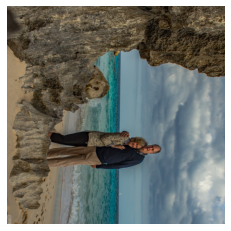

In [27]:
# Rotate
rotated_img = cv.rotate(img, cv.ROTATE_90_CLOCKWISE)  # add code to rotate
plot_cv_img(rotated_img)

## Rotate the image using scipy (might have to install if necessary)

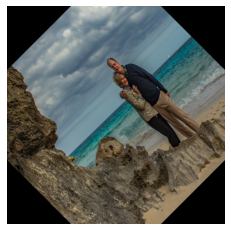

In [28]:
# Rotate
from scipy import ndimage
rotated_img = ndimage.rotate(img, 45, reshape=False) # add code to rotate
plot_cv_img(rotated_img)

In [34]:
!pip install scikit-image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 22.9 MB/s eta 0:00:0000:0100:01
DEPRECATION: uvicorn 0.14.0 has a non-standard dependency specifier click>=7.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of uvicorn or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.0.0
    Uninstalling Pillow-9.0.0:
      Successfully uninstalled Pillow-9.0.0


In [33]:
!pip install --upgrade pip

     |████████████████████████████████| 2.1 MB 3.7 MB/s            
  Attempting uninstall: pip
    Found existing installation: pip 21.3.1
    Uninstalling pip-21.3.1:
      Successfully uninstalled pip-21.3.1


In [44]:
!pip install --upgrade pyxel-damerau-levenshtein

ERROR: Could not find a version that satisfies the requirement pyxel-damerau-levenshtein (from versions: none)
ERROR: No matching distribution found for pyxel-damerau-levenshtein


## Add Salt and Pepper Noise

In [48]:
#add salt and pepper noise
from skimage.util import random_noise
# Add salt-and-pepper noise to the image.

noise_img = random_noise(img, mode='s&p', amount=0.1)  # add code to add salt and pepper noise
 
# The above function returns a floating-point image
# on the range [0, 1], thus we changed it to 'uint8'
# and from [0,255]

noise_img = np.array(255*noise_img, dtype = 'uint8')

plot_cv_img(noise_img)

ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 88 from C header, got 80 from PyObject

## Add Gaussian noise

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


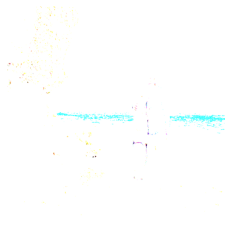

In [45]:
import numpy as np

gauss = np.random.normal(0, 0.1, img.shape ) # add code  to add gaussian noise
gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')

# Add the Gaussian noise to the image
img_gauss = cv.add(img.astype(np.float32), gauss.astype(np.float32))  # Add the noise to the image
# Display the image
plot_cv_img(img_gauss )

## Add Speckle Noise with color

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


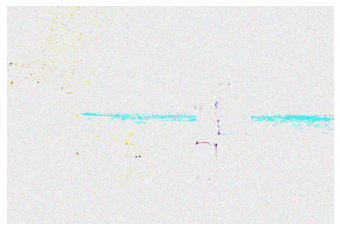

In [161]:
#Speckle Noise
import numpy as np
 
img = cv.imread('pictures/bermuda.jpg')
 
gauss = np.random.normal(0, 10, img.shape) + 1  # add code to add speckle noise
gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
speckle_img = img.astype(np.float32) * gauss.astype(np.float32)
plot_cv_img(speckle_img )

## Set up layers and colors

In [49]:
layer_name = net.getLayerNames()
output_layer = [layer_name[i - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

## Fire up Model

In [50]:
#note - 0.00392 = 1/250   416 is a standard square for yolo

scalefactor = 1/255.0
size = (416, 416)  
mean = (0, 0, 0)  
swapRB = True 
crop = False 


blob = cv.dnn.blobFromImage(img, scalefactor, size, mean, swapRB, crop)  # Fill in other fields to create image compatible with cv

#detect objects
net.setInput(blob)
outs = net.forward(output_layer)

## Set up image on screen  (all done for you)
* Note how to extract the identified objects and their assocated confidence.  You need that for part 2 of this assignment

Type:  <class 'list'>
[6 4]
Object: person with confidence of 1.00
Object: person with confidence of 1.00


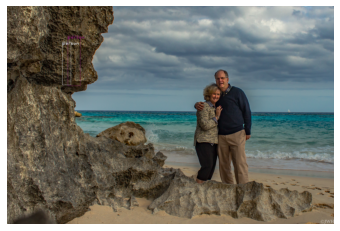

In [39]:
# Showing Information on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detection
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # cv.circle(img, (center_x, center_y), 10, (0, 255, 0), 2 )
            # Reactangle Cordinate
            x = int(center_x - w/2)
            y = int(center_y - h/2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
           
print("Type: ", type(class_ids))

indexes = cv.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
print(indexes)

font = cv.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        print(f'Object: {label} with confidence of {confidences[i]:.2f}')
        color = colors[i]
        cv.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv.putText(img, label, (x, y + 30), font, 3, color, 3)

plot_cv_img(img)

# Summary
### Note the point at which the resize of the image degrades the image where the model can no longer detect the objects.  Graph the degradation confidence.



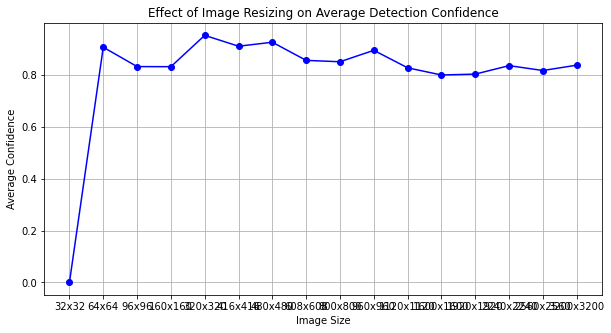

In [83]:
# Load model
net = cv.dnn.readNet("yolov3.weights",  #note weights to too big for github must save within readme
                     "yolov3.cfg")

img = cv.imread("pictures/bermuda.jpg")

sizes = [(32,32), (64,64), (96,96), (160, 160), (320, 320), (416, 416), (480,480), (608, 608), (800,800), (960, 960), (1120, 1120), (1600,1600), (1920, 1920), (2240,2240), (2560, 2560), (3200, 3200)]

average_confidences = []

for size in sizes:
    img = cv.imread("pictures/bermuda.jpg")
  
    scalefactor = 1/255.0
    mean = (0, 0, 0)  
    swapRB = True 
    crop = False 

    resized_img = cv.resize(img, size)
    blob = cv.dnn.blobFromImage(resized_img, scalefactor, size, mean, swapRB, crop)  # Fill in other fields to create image compatible with cv

    net.setInput(blob)
    outs = net.forward(output_layer)
    
    class_ids = []
    confidences = []
    boxes = []
    
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                # Object detection
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - w/2)
                y = int(center_y - h/2)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    if confidences:
        avg_confidence = sum(confidences) / len(confidences)
    else:
        avg_confidence = 0
    average_confidences.append(avg_confidence)
    

size_labels = [f"{s[0]}x{s[1]}" for s in sizes]

plt.figure(figsize=(10, 5))
plt.plot(size_labels, average_confidences, marker='o', linestyle='-', color='b')
plt.xlabel('Image Size')
plt.ylabel('Average Confidence')
plt.title('Effect of Image Resizing on Average Detection Confidence')
plt.grid(True)
plt.show()

I utilzed average detection confidence to attempt to answer this question. Based on the graph above there seems to be a sharp drop at 32x32 where there is a 0 confidence that the model can detect whats in the image

### Note the point at which the Gaussian noise and the salt and peper noise degrades the image where the model can no longer detect the objects.  Graph the degradtion condifidence.


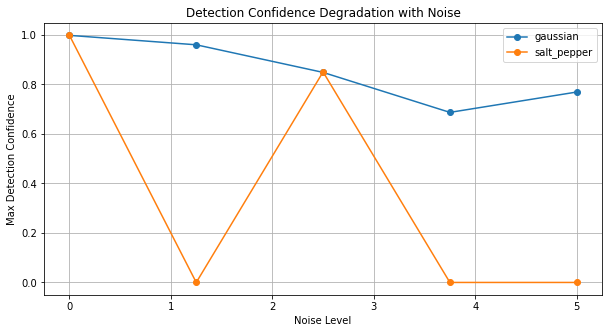

In [168]:
def add_gaussian_noise(image, mean=0, var=0.1):
    gauss = np.random.normal(mean, var, image.shape)
    gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
    noisy_image = cv.add(img.astype(np.float32), gauss.astype(np.float32))  # Add the noise to the image
    return noisy_image

def add_salt_pepper_noise(image, amount=0.05):
    row, col, ch = image.shape
    s_vs_p = 0.5
    out = np.copy(image)
    # Salt mode
    num_salt = np.ceil(amount * image.size * s_vs_p)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    out[coords[0], coords[1], :] = 255
    # Pepper mode
    num_pepper = np.ceil(amount * image.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    out[coords[0], coords[1], :] = 0
    return out

# Load YOLO model
net = cv.dnn.readNet("yolov3.weights", "yolov3.cfg")

# Original image
img = cv.imread("pictures/bermuda.jpg")
height, width = img.shape[:2]

# Noise levels to test
noise_levels = np.linspace(0, 5, 5)

# Store results
results = {
    'gaussian': [],
    'salt_pepper': []
}

for noise_level in noise_levels:
    # Apply Gaussian noise
    gaussian_noisy_img = add_gaussian_noise(img, 0, var=noise_level)
    # Apply Salt and Pepper noise
    sp_noisy_img = add_salt_pepper_noise(img, amount=noise_level)

    for noise_type, noisy_img in [('gaussian', gaussian_noisy_img), ('salt_pepper', sp_noisy_img)]:
        # Convert image to blob
        blob = cv.dnn.blobFromImage(noisy_img, 1/255.0, (416, 416), (0,0,0), swapRB=True, crop=False)
        net.setInput(blob)
        outs = net.forward(output_layers)

        # Process detections
        confidences = []
        for out in outs:
            for detection in out:
                scores = detection[5:]
                confidence = scores[np.argmax(scores)]
                if confidence > 0.5:
                    confidences.append(float(confidence))

        # Record the highest confidence for this noise level
        max_confidence = max(confidences) if confidences else 0
        results[noise_type].append(max_confidence)

# Plotting the results
plt.figure(figsize=(10, 5))
for noise_type, confidences in results.items():
    plt.plot(noise_levels, confidences, marker='o', label=noise_type)

plt.title('Detection Confidence Degradation with Noise')
plt.xlabel('Noise Level')
plt.ylabel('Max Detection Confidence')
plt.legend()
plt.grid(True)
plt.show()

It seems that the level at which the model can no longer detect the objects is around 4.5 for both types of noise. Salt and pepper noise seems to affect the model quicker where its confidence goes down to 0 at about 0.5. Gaussian noise however has a much slower decline until 4 when it drastically drops.

### Note techniques in the model and/or image that improve the object detection.

#### Image Changes
There are a few items that you could do to make the image better to improve the object detection. It may be useful to normalize or standardize the images pixels for a more efficient and accurate model learning process. It may also be useful to increase the brightness of the image for easier separation of the background compared to the "objects in the image.


#### Model Changes
